<a href="https://colab.research.google.com/github/PythonicPastor/PokeDex/blob/main/PokeDex_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

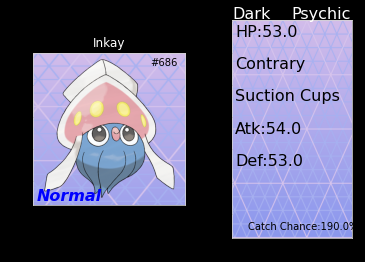

In [12]:
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image


df = pd.read_csv('https://raw.githubusercontent.com/PythonicPastor/PokeDex/main/pokedex.csv')
#Set Variables
mod = 1
pokeNum = np.random.choice(df.shape[0])

bg = Image.open(urlopen('https://github.com/PythonicPastor/PokeDex/blob/main/bg.png?raw=true'))
bg2 = Image.open(urlopen('https://github.com/PythonicPastor/PokeDex/blob/main/bg2.png?raw=true'))
#bg = io.imread('https://github.com/PythonicPastor/PokeDex/blob/main/bg.png')
#bg2 = io.imread('https://github.com/PythonicPastor/PokeDex/blob/main/bg2.png')

#Clean Data
df = df.drop(df.columns.difference(['pokedex_number',
                                    'name',
                                    'status',
                                   'type_1',
                                    'type_2',
                                    'ability_1',
                                    'ability_2',
                                    'hp',
                                    'attack',
                                    'defense',
                                    'catch_rate'
                                   ]), axis=1)

#df['Legendary'] = df.loc[df['Legendary'] == True,['Legendary']].replace(True, 'Legendary')
df = df.replace(np.nan, '')
#list(df.columns)

#Assign Image to Pokedex
if pokeNum <= 12:
    image = io.imread('https://assets.pokemon.com/assets/cms2/img/pokedex/full/00'+str(df.iloc[pokeNum]['pokedex_number'])+'.png')
elif 12 < pokeNum <= 102:
    image = io.imread('https://assets.pokemon.com/assets/cms2/img/pokedex/full/0'+str(df.iloc[pokeNum]['pokedex_number'])+'.png')
else:
    image = io.imread('https://assets.pokemon.com/assets/cms2/img/pokedex/full/'+str(df.iloc[pokeNum]['pokedex_number'])+'.png')

#Plot Images and Basic Stats to Pokedex
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})    

title= df.iloc[pokeNum]['name'];
plt.subplot(1, 2, 1)
plt.title(title)
plt.imshow(bg2)
plt.imshow(image)
plt.text(10,460, df.iloc[pokeNum]['status'], color = 'Blue', size=16, weight ='bold', style ="italic")
plt.text(365,40,'#'+str(df.iloc[pokeNum]['pokedex_number']), color = 'black')

plt.subplot(1, 2, 2)
plt.imshow(bg)
plt.text(0,-5,df.iloc[pokeNum]['type_1'], size=16)
plt.text(185,-5,df.iloc[pokeNum]['type_2'], size=16)
plt.text(10,50,'HP:'+str(df.iloc[pokeNum]['hp']), color='black', size=16)
plt.text(10,150,df.iloc[pokeNum]['ability_1'], color='black', size=16)
plt.text(10,250,df.iloc[pokeNum]['ability_2'], color='black', size=16)
plt.text(10,350,'Atk:'+str(df.iloc[pokeNum]['attack']), color='black', size=16)
plt.text(10,450,'Def:'+str(df.iloc[pokeNum]['defense']), color='black', size=16)
plt.text(50,650,'Catch Chance:'+ str(df.iloc[pokeNum]['catch_rate'])+'%', color='black')

plt.show()